In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader("aapl", 'google')

trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

In [9]:


import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime
import pandas_datareader.data as web

df = web.DataReader("aapl", 'google')

trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
layout = {
    'title': 'The Great Recession',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Increase Period Begins'
    }]
}
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='aapl-recession-candlestick')



RemoteDataError: Unable to read URL: http://www.google.com/finance/historical?q=aapl&startdate=Jan+01%2C+2010&enddate=Jan+03%2C+2018&output=csv

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt

#Reset the index to remove Date column from index
df_ohlc = df.reset_index()

#Naming columns
df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Converting dates column to float values
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

#Making plot
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
print(df_ohlc)

#Making candlestick plot
candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)
plt.ylabel("Price")
plt.legend()

plt.show()

C:\Users\sseie\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning:

The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.



ValueError: Length mismatch: Expected axis has 7 elements, new values have 5 elements

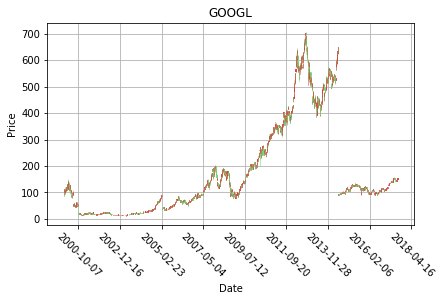

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):

    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)


    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(315)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('GOOGL')

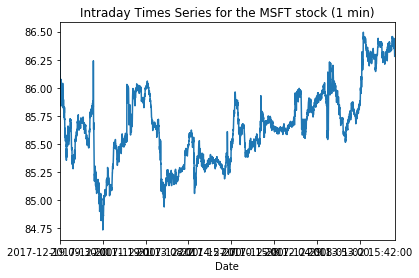

In [18]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='5AQRM1BDCWT79RQF', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()